In [8]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

file_path1 = 'data/HKQuantityTypeIdentifierSwimmingStrokeCount.csv'
file_path2 = 'data/HKQuantityTypeIdentifierDistanceSwimming.csv'
file_path3 = 'data/HKQuantityTypeIdentifierActiveEnergyBurned.csv'
file_path4 = 'data/HKQuantityTypeIdentifierDistanceCycling.csv'
file_path5 = 'data/HKQuantityTypeIdentifierDistanceWalkingRunning.csv'
file_path6 = 'data/HKQuantityTypeIdentifierHeartRate.csv'
file_path7 = 'data/HKQuantityTypeIdentifierStepCount.csv'


df1 = pd.read_csv(file_path1, delimiter=';', skiprows=1, on_bad_lines='skip')
df2 = pd.read_csv(file_path2, delimiter=';', skiprows=1, on_bad_lines='skip')
df3 = pd.read_csv(file_path3, delimiter=';', skiprows=1, on_bad_lines='skip',low_memory=False)
df4 = pd.read_csv(file_path4, delimiter=';', skiprows=1, on_bad_lines='skip',low_memory=False)
df5 = pd.read_csv(file_path5, delimiter=';', skiprows=1, on_bad_lines='skip',low_memory=False)
df6 = pd.read_csv(file_path6, delimiter=';', skiprows=1, on_bad_lines='skip',low_memory=False)
df7 = pd.read_csv(file_path7, delimiter=';', skiprows=1, on_bad_lines='skip',low_memory=False)


df1.columns = [col.strip() for col in df1.columns]
df2.columns = [col.strip() for col in df2.columns]
df3.columns = [col.strip() for col in df3.columns]
df4.columns = [col.strip() for col in df4.columns]
df5.columns = [col.strip() for col in df5.columns]
df6.columns = [col.strip() for col in df6.columns]
df7.columns = [col.strip() for col in df7.columns]

df1['startdate'] = pd.to_datetime(df1['startdate'])
df1['enddate'] = pd.to_datetime(df1['enddate'])
df2['startdate'] = pd.to_datetime(df2['startdate'])
df2['enddate'] = pd.to_datetime(df2['enddate'])
df3['startdate'] = pd.to_datetime(df3['startdate'])
df3['enddate'] = pd.to_datetime(df3['enddate'])
df4['startdate'] = pd.to_datetime(df4['startdate'])
df4['enddate'] = pd.to_datetime(df4['enddate'])
df5['startdate'] = pd.to_datetime(df5['startdate'])
df5['enddate'] = pd.to_datetime(df5['enddate'])
df6['startdate'] = pd.to_datetime(df6['startdate'])
df6['enddate'] = pd.to_datetime(df6['enddate'])
df7['startdate'] = pd.to_datetime(df7['startdate'])
df7['enddate'] = pd.to_datetime(df7['enddate'])


df1 = df1[['startdate', 'enddate', 'value']]
df2 = df2[['startdate', 'enddate', 'value']]
df3 = df3[['startdate', 'enddate', 'value']]
df4 = df4[['startdate', 'enddate', 'value']]
df5 = df5[['startdate', 'enddate', 'value']]
df6 = df6[['startdate', 'enddate', 'value']]
df7 = df7[['startdate', 'enddate', 'value']]




merged_df = pd.merge(df1, df2, on=['startdate', 'enddate'],how='outer', suffixes=('_stroke', '_distancestroke'))
merged_df = pd.merge(merged_df, df3, on=['startdate', 'enddate'],how='outer', suffixes=('', '_energyburned'))
merged_df = pd.merge(merged_df, df4, on=['startdate', 'enddate'],how='outer', suffixes=('', '_distancecycling'))
merged_df = pd.merge(merged_df, df5, on=['startdate', 'enddate'],how='outer', suffixes=('', '_distancewalkrun'))
merged_df = pd.merge(merged_df, df6, on=['startdate', 'enddate'],how='outer', suffixes=('', '_heartrate'))
merged_df = pd.merge(merged_df, df7, on=['startdate', 'enddate'],how='outer', suffixes=('', '_steps'))


output_path = 'data/merged_file.csv'
merged_df.to_csv(output_path, index=False)

output_path







'data/merged_file.csv'

In [6]:
import pandas as pd

# Load the merged file
file_path = 'data/merged_file.csv'
merged_df = pd.read_csv(file_path)

# Convert 'startdate' and 'enddate' to datetime
merged_df['startdate'] = pd.to_datetime(merged_df['startdate'])
merged_df['enddate'] = pd.to_datetime(merged_df['enddate'])

# Create a new column 'timestamp' by rounding 'startdate' to the nearest 60 seconds
merged_df['timestamp'] = merged_df['startdate'].dt.round('60S')

# Select only numeric columns to avoid issues during mean calculation
numeric_columns = merged_df.select_dtypes(include='number').columns

# Group by the new 'timestamp' and calculate the mean for numeric columns
resampled_df = merged_df.groupby('timestamp')[numeric_columns].mean().reset_index()

# Save the resampled dataframe to a new CSV file
output_path = 'data/merged_resampled_file.csv'
resampled_df = resampled_df.fillna(0)
resampled_df.to_csv(output_path, index=False)

# Output the path of the saved file
print(f"Resampled data saved to: {output_path}")


/var/folders/f2/gq8xgm9x491cqwtct_tgpy0h0000gn/T/ipykernel_8836/4013113154.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  merged_df['timestamp'] = merged_df['startdate'].dt.round('60S')


Resampled data saved to: data/merged_resampled_file.csv


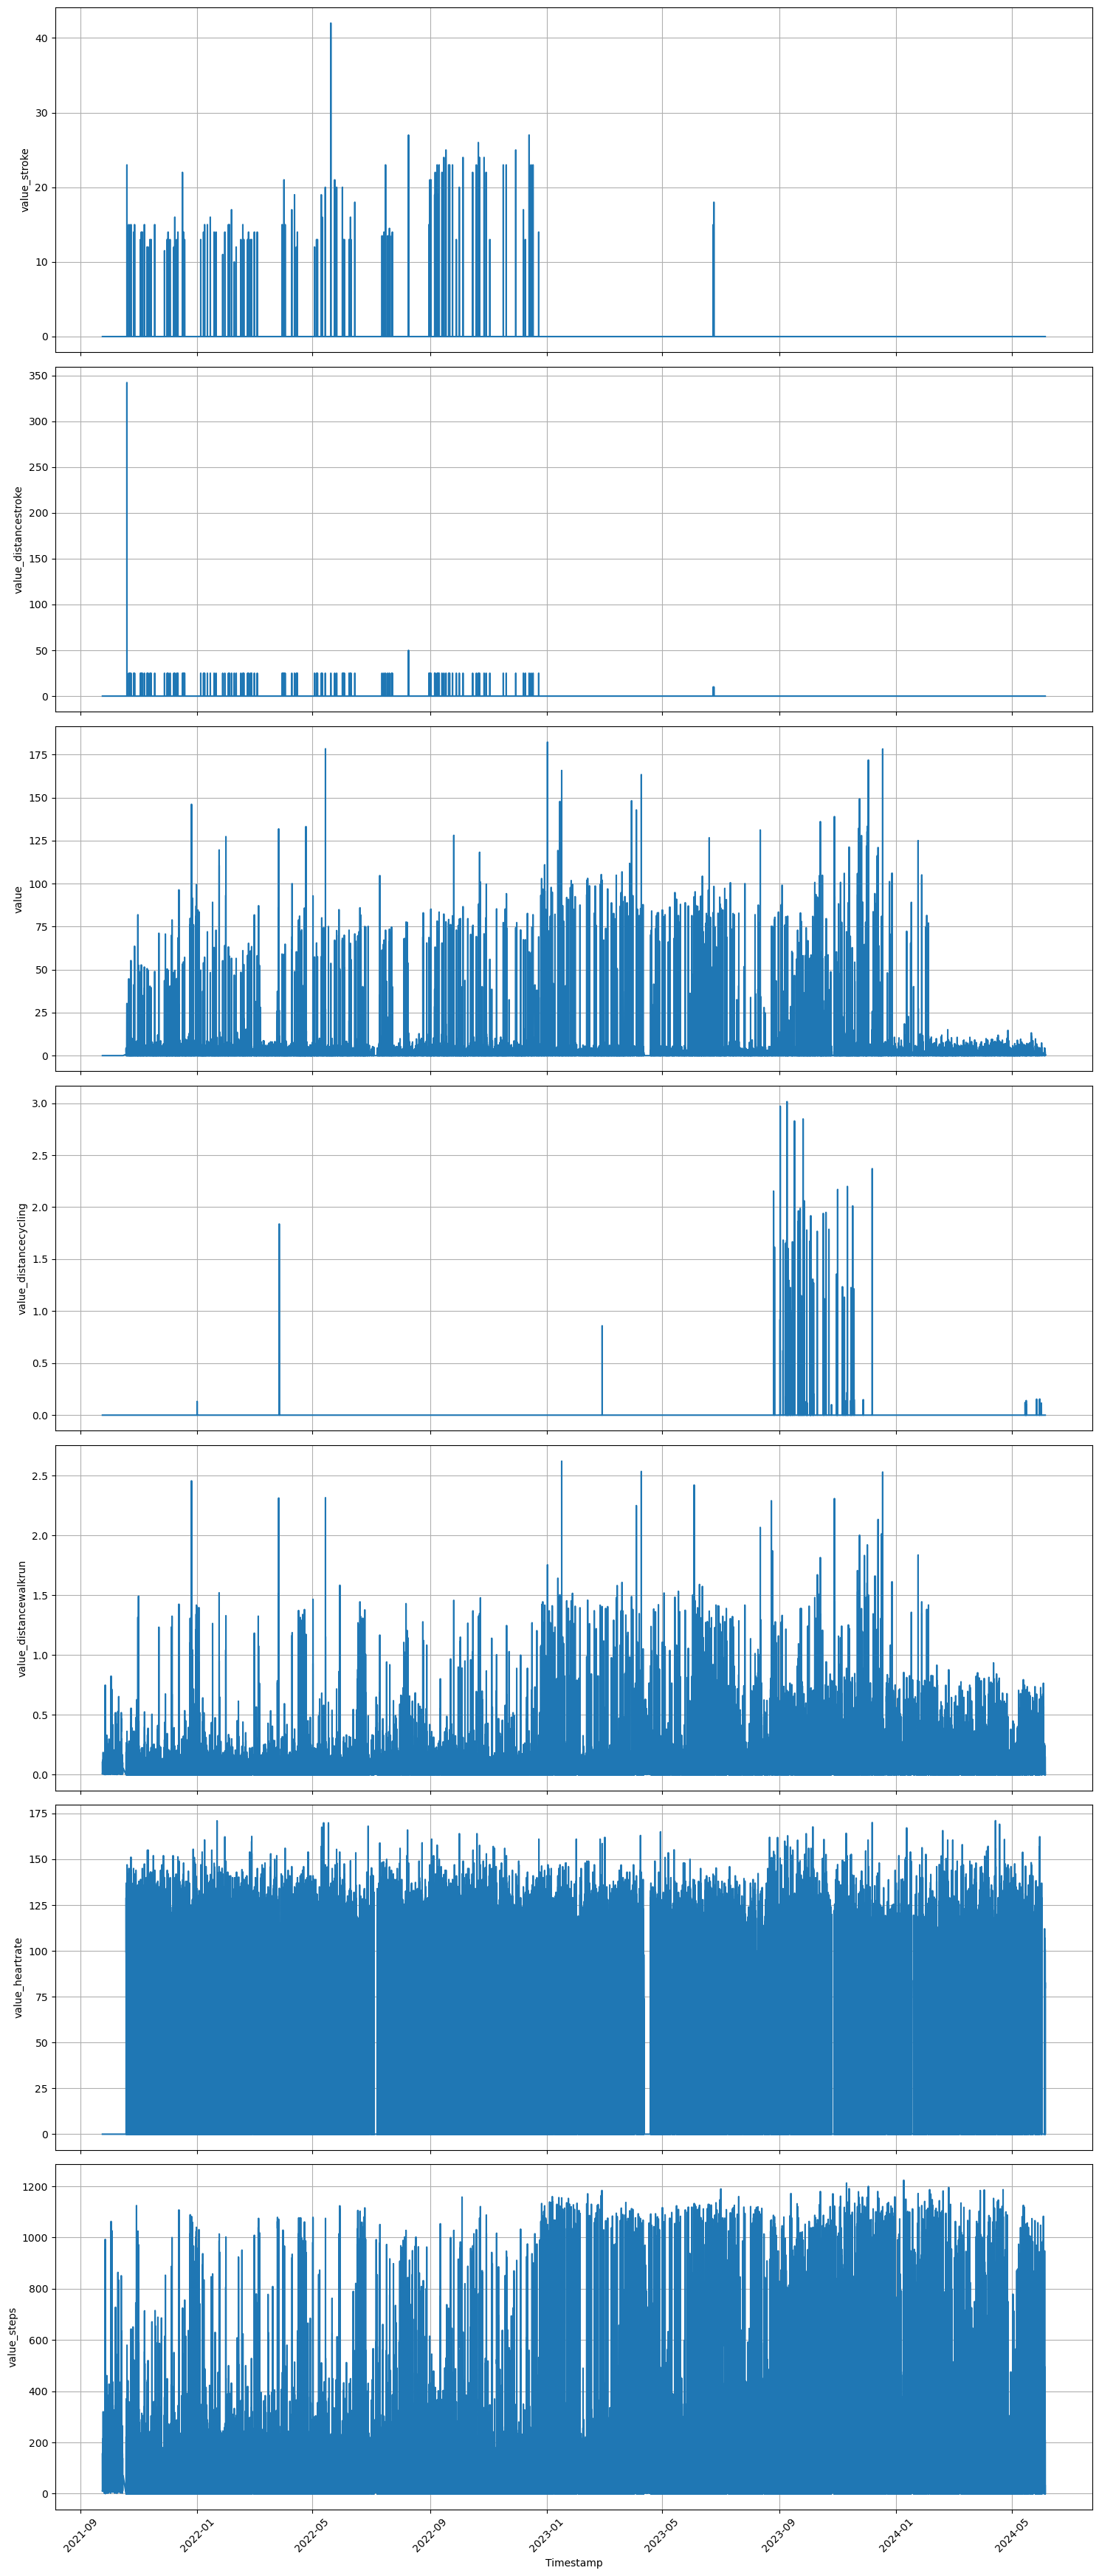

In [10]:
num_columns = len(numeric_columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(15, 5 * num_columns), sharex=True)

for i, column in enumerate(numeric_columns):
    axes[i].plot(resampled_df['timestamp'], resampled_df[column])
    axes[i].set_ylabel(column)
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

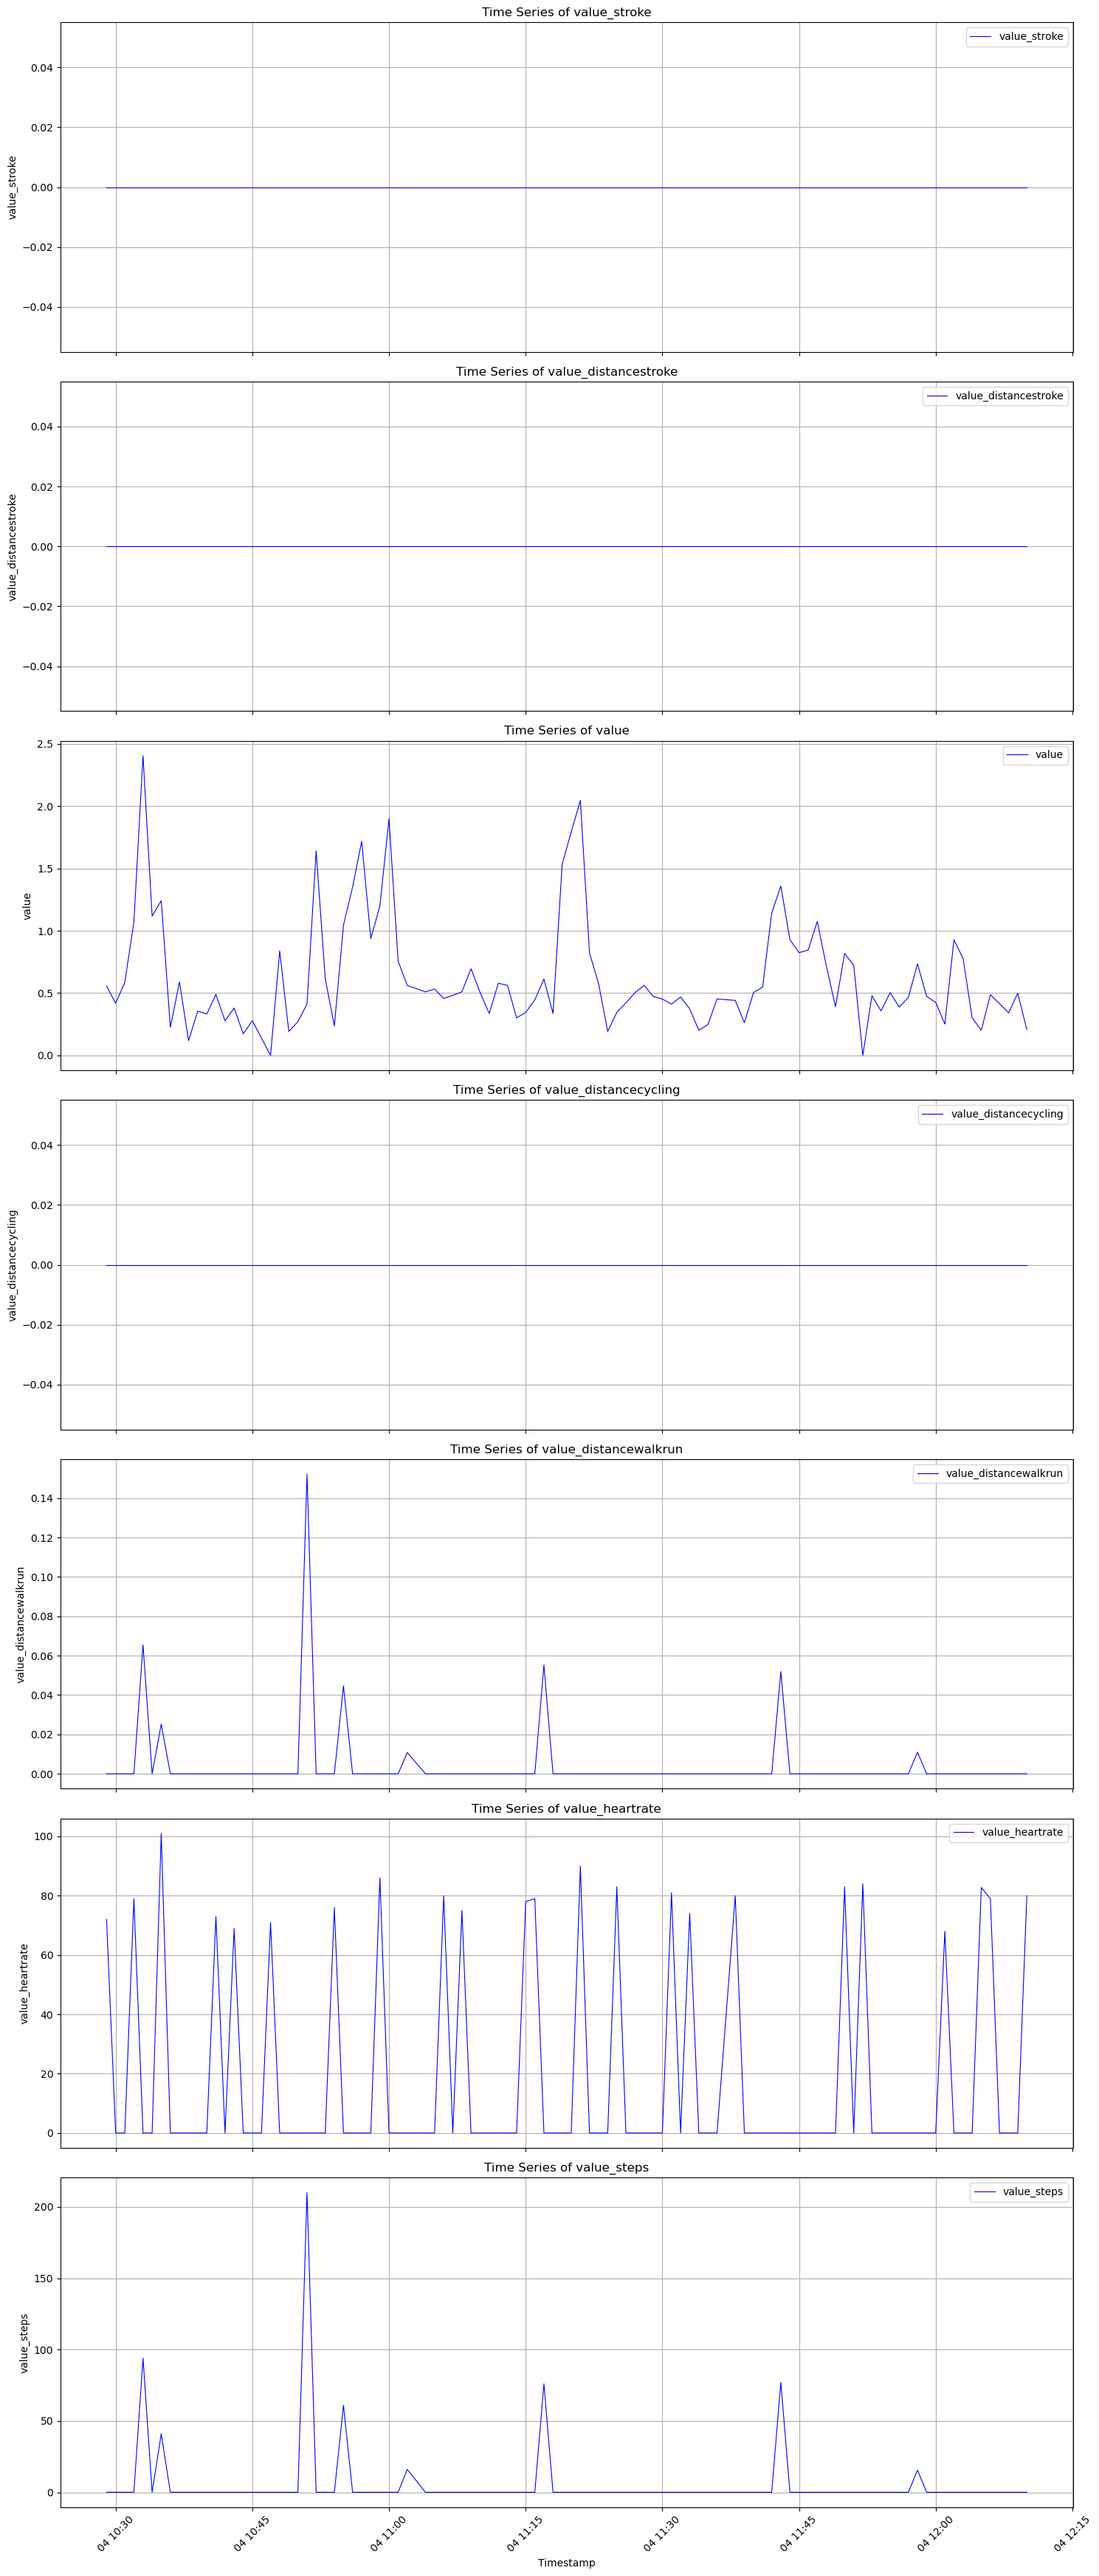

In [15]:
num_columns = len(numeric_columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(15, 5 * num_columns), sharex=True)

# Select the last 100 time series data points
last_100_data = resampled_df.tail(100)

for i, column in enumerate(numeric_columns):
    axes[i].plot(last_100_data['timestamp'], last_100_data[column], label=column, color='blue', linewidth=0.8)
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Time Series of {column}', fontsize=12)
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
